# Naive Bayes Classification for groovy-1_6_BETA_1 Dataset

This notebook implements Naive Bayes classification on the CSBBOOST-balanced groovy-1_6_BETA_1 dataset for software defect prediction.

In [1]:
dataset_name = "groovy-1_6_BETA_1"    # ej. "activemq-5.0.0"
method_name  = "csbboost"          # ej. "hcbou", "csbboost", etc.
# ============================================================

# Generación automática de nombres de archivo (sin modificar flujo)
train_features_file = f"{dataset_name}-{method_name}-train-features-balanced-scaled.csv"
train_labels_file   = f"{dataset_name}-{method_name}-train-labels-balanced.csv"
test_features_file  = f"{dataset_name}-{method_name}-test-features-scaled.csv"
test_labels_file    = f"{dataset_name}-{method_name}-test-labels.csv"

In [2]:
import pandas as pd
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

## Load CSBBOOST-Balanced Dataset

In [3]:
## Load CSBBOOST-Balanced Dataset

# Load training data (balanced and scaled)
train_df = pd.read_csv(train_labels_file)
if "class" in train_df.columns:
    y_train = train_df["class"]
else:
    # Fallback: tomar la primera columna si cambia el nombre
    y_train = train_df.iloc[:, 0]

X_train = pd.read_csv(train_features_file)

# Load test data (scaled)
test_df = pd.read_csv(test_labels_file)
if "RealBug" in test_df.columns:
    y_test = test_df["RealBug"]
else:
    # Fallback genérico
    y_test = test_df.iloc[:, 0]

X_test = pd.read_csv(test_features_file)

print(f"Training set shape: {X_train.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Test set shape: {X_test.shape}")
print(f"Test labels shape: {y_test.shape}")

print(f"\nTraining set class distribution:")
print(y_train.value_counts())

print(f"\nTest set class distribution:")
print(y_test.value_counts())

Training set shape: (656, 65)
Training labels shape: (656,)
Test set shape: (165, 65)
Test labels shape: (165,)

Training set class distribution:
RealBug
0    328
1    328
Name: count, dtype: int64

Test set class distribution:
RealBug
0    151
1     14
Name: count, dtype: int64


## Naive Bayes Model Implementation

In [4]:
# Initialize Gaussian Naive Bayes with default parameters
nb_model = GaussianNB()

print("Naive Bayes Model Configuration:")
print(f"Algorithm: Gaussian Naive Bayes")
print(f"Variance smoothing: {nb_model.var_smoothing}")

Naive Bayes Model Configuration:
Algorithm: Gaussian Naive Bayes
Variance smoothing: 1e-09


## Model Training

In [5]:
# Train the Naive Bayes model
print("Training Naive Bayes model...")
nb_model.fit(X_train, y_train)
print("Training completed!")

print(f"\nModel trained on {X_train.shape[0]} samples")
print(f"Number of features: {X_train.shape[1]}")
print(f"Number of classes: {len(nb_model.classes_)}")
print(f"Classes: {nb_model.classes_}")

Training Naive Bayes model...
Training completed!

Model trained on 656 samples
Number of features: 65
Number of classes: 2
Classes: [0 1]


## Model Evaluation

In [6]:
# Generate predictions
y_pred = nb_model.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label=True)
recall = recall_score(y_test, y_pred, pos_label=True)
f1 = f1_score(y_test, y_pred, pos_label=True)

print("Naive Bayes Performance Metrics:")
print("=" * 40)
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1-Score:  {f1:.4f}")

Naive Bayes Performance Metrics:
Accuracy:  0.8727
Precision: 0.2667
Recall:    0.2857
F1-Score:  0.2759


In [7]:
# Detailed classification report
print("\nDetailed Classification Report:")
print("=" * 50)
print(classification_report(y_test, y_pred))


Detailed Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       151
           1       0.27      0.29      0.28        14

    accuracy                           0.87       165
   macro avg       0.60      0.61      0.60       165
weighted avg       0.88      0.87      0.87       165



## Confusion Matrix

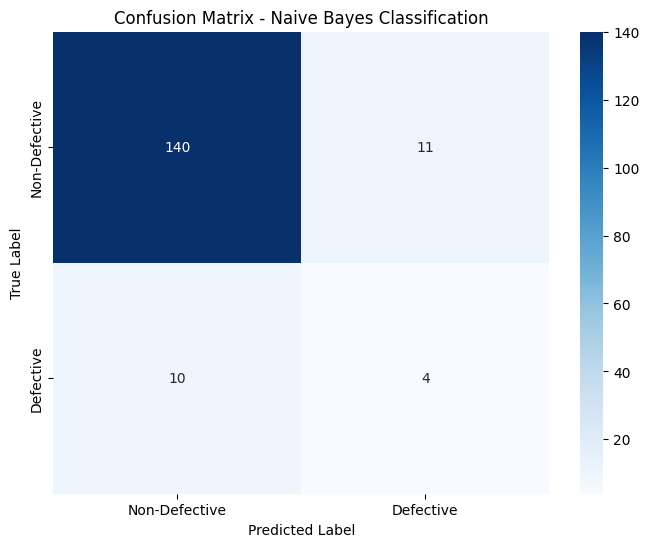


Confusion Matrix:
True Label vs Predicted Label
                 Non-Defective  Defective
Non-Defective         140          11    
Defective             10            4    


In [8]:
# Generate and display confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Non-Defective', 'Defective'],
            yticklabels=['Non-Defective', 'Defective'])
plt.title('Confusion Matrix - Naive Bayes Classification')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

print("\nConfusion Matrix:")
print("True Label vs Predicted Label")
print(f"                 Non-Defective  Defective")
print(f"Non-Defective    {cm[0,0]:^13}  {cm[0,1]:^9}")
print(f"Defective        {cm[1,0]:^13}  {cm[1,1]:^9}")

## Summary

In [9]:
print(f"Naive Bayes Classification Summary for {dataset_name}")
print("=" * 55)
print(f"Dataset: {dataset_name} ({method_name.upper()}-balanced)")
print(f"Training samples: {X_train.shape[0]}")
print(f"Test samples: {X_test.shape[0]}")
print(f"Features: {X_train.shape[1]}")
print(f"\nNaive Bayes Configuration:")
print(f"- Algorithm: Gaussian Naive Bayes")
print(f"- Variance smoothing: {nb_model.var_smoothing}")
print(f"- Feature independence assumption: Yes")
print(f"\nPerformance:")
print(f"- Accuracy: {accuracy:.4f}")
print(f"- Precision: {precision:.4f}")
print(f"- Recall: {recall:.4f}")
print(f"- F1-Score: {f1:.4f}")

Naive Bayes Classification Summary for groovy-1_6_BETA_1
Dataset: groovy-1_6_BETA_1 (CSBBOOST-balanced)
Training samples: 656
Test samples: 165
Features: 65

Naive Bayes Configuration:
- Algorithm: Gaussian Naive Bayes
- Variance smoothing: 1e-09
- Feature independence assumption: Yes

Performance:
- Accuracy: 0.8727
- Precision: 0.2667
- Recall: 0.2857
- F1-Score: 0.2759
